In [44]:
from math import sqrt, log, exp, pi
from random import uniform
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import seaborn as sns 
import pandas as pd
sns.set_style('white')
%matplotlib inline

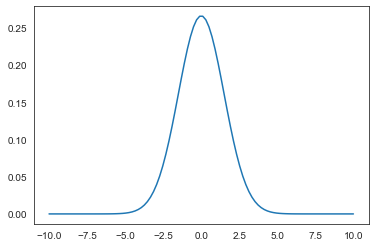

In [45]:
#Return evenly spaced numbers over a specified interval.
x = np.linspace(start=-10, stop=10, num=100)
#A normal continuous random variable.
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
y = stats.norm.pdf(x, loc=0, scale=1.5) 
#plot it!
plt.plot(x, y)

In [46]:
df = pd.read_csv("C:\\code\\ML-practicE\\shit-easy projects for practice smth\\algorithms without libs\\datasets\\bimodal.csv")

In [47]:
data = df.x 

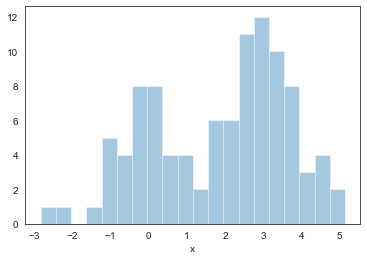

In [48]:
#plot
sns.distplot(data, bins=20, kde=False)

In [49]:
class Gaussian:
    #Model univariate Gaussian

    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu 
        self.sigma = sigma
    
    #probability density func
    def pdf(self, datum):
        #probability of the data point given the current params
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    #printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6}'.format(self.mu, self.sigma)

In [50]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 1.9, σ = 1.8


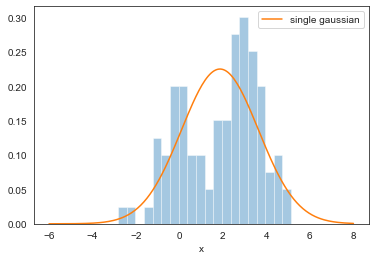

In [51]:
#fit a single gaussian curve to the data
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [55]:
class GaussianMixture:
    #model mixture of 2 univariate Gaussians and their EM estimation 

    def __init__(self, data, mu_min=min(data), mu_max = max(data), sigma_min = .1, sigma_max = 1, mix = .5):
        self.data = data 
        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max),
                        uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max),
                        uniform(sigma_min, sigma_max))
        #as well as how much to mix them 
        self.mix = mix

    def Estep(self):
        ###perform an e-step, freshering up self.loglike in the process 
        #compute weights
        self.loglike = 0. # = log(p=1)
        for datum in self.data: 
            #unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1.-self.mix)
            #compute denominator
            den = wp1 + wp2
            #normalize 
            wp1 /= den
            wp2 /= den
            
            #add into loglike
            self.loglike += log(wp1 + wp2)

            #yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        ###Perform an M-step
        (left, right) = zip(*weights)
        one_den = sum(left)
        two_den = sum(right)
        #compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(right, data))
        #compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        #compute new mix
        self.mix = one_den / len(data)

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

AttributeError: type object 'GaussianMixture' has no attribute 'loglike'

In [53]:
print(GaussianMixture.loglike)

AttributeError: type object 'GaussianMixture' has no attribute 'loglike'

In [54]:

# Check out the fitting process
n_iterations = 5
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass



AttributeError: 'GaussianMixture' object has no attribute 'loglike'